In [2]:
#Χαρτερός Σταμάτιος ΑΕΜ:9516
import numpy as np
import sklearn
import math
from matplotlib import pyplot as plt
%matplotlib inline
#Κλάση classifier για το ΜΕΡΟΣ Α
class classifier:
    #συναρτηση με ορισματα ενα συνολο τιμων που αντιστοιχουν σε μια κλαση, τιμες για το θ,και εναν τιτλο για το γραφημα
    #και επιστρεφει το θ^ και τον πινακα με τα γινομενα για καθε θ
    def fit(D,u,title): 
        product=np.zeros(len(u))
        uT=0
        for x in range(len(u)):
            product[x]=1
            for y in range(len(D)):
                product[x]=product[x]*((1/math.pi)*(1/(1+(D[y]-u[x])**2)))
        maxProduct=product[0];
        for x in range(len(u)):
            if product[x]>maxProduct:
                maxProduct=product[x]
                uT=u[x]
        uT=round(uT,2)   #στογγυλοποίηση τoυ θ
        logPD=np.zeros(len(u))
        for x in range(len(u)): 
            logPD[x]=math.log(product[x])
        plt.figure()
        plt.plot(u,logPD)
        plt.title(title)
        plt.xlabel('θ')
        return uT ,product
    #συναρτηση με ορισματα ενα συνολο που δεχεται τιμες για την μεταβλητη x(D) α-priori πιθανοτητες για τις κλασεις ω1 και ω2 και τα θ^1 και θ^2
    #και επιστρεφει τις τιμες την διαχωριστικης g(x)
    def predict(D,Pw1,Pw2,u1,u2):
        G=np.zeros(len(D)) #τιμες g για καθε δεδομενο του D
        classified=np.zeros(len(D)) #classification 1 η 2 για καθε δεδομενο του D
        for i in range(len(D)):
            G[i]=math.log((1/math.pi)*(1/(1+(D[i]-u1)**2)))+math.log(Pw1)-math.log((1/math.pi)*(1/(1+(D[i]-u2)**2)))-math.log(Pw2)
            if G[i]>0:
                classified[i]=1
            else:
                classified[i]=2
        for i in range(len(D)):
            if classified[i]==1:
                print("index value:",D[i],"->not stressed->","g =",G[i])
            else:
                print("index value:",D[i],"->stressed->","g =",G[i])
                
        #σχεδιαση της g(x)
        x=np.arange(-10, 10, 0.1)
        Gtotal=np.zeros(len(x))
        for i in range(len(x)):
            Gtotal[i]=math.log((1/math.pi)*(1/(1+(x[i]-u1)**2)))+math.log(Pw1)-math.log((1/math.pi)*(1/(1+(x[i]-u2)**2)))-math.log(Pw2)
        plt.plot(x,Gtotal,label="g(x)")
        plt.xlabel('x')
        return G
        

Με την μεθοδο μεγιστης πιθανοφανειας υπολογιζω θ^1= 2.6 και θ^2= -3.2


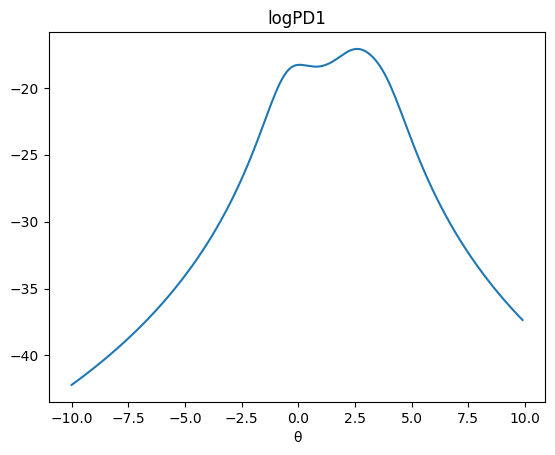

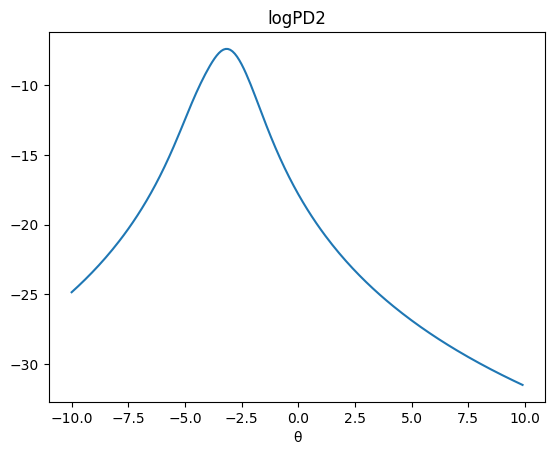

In [3]:
#ΜΕΡΟΣ Α ΕΡΩΤΗΜΑ 1
D1=np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1]) #ενιωσαν στρες
D2=np.array([-4.5, -3.4, -3.1, -3.0, -2.3]) #δεν ενιωσαν στρες
th= np.arange(-10, 10, 0.1) #τιμες για τo θ

u1T ,Pd1= classifier.fit(D1,th,"logPD1") #το θ^1(u1T) και τa γινομενα για καθε θ(Pd1) 
u2T ,Pd2= classifier.fit(D2,th,"logPD2") #το θ^2(u2T) και τa γινομενα για καθε θ(Pd2) 

print("Με την μεθοδο μεγιστης πιθανοφανειας υπολογιζω θ^1=",u1T,"και θ^2=",u2T)

index value: 2.8 ->not stressed-> g = 3.9081694361121566
index value: -0.4 ->not stressed-> g = 0.2131740202767194
index value: -0.8 ->stressed-> g = -0.28302203436396667
index value: 2.3 ->not stressed-> g = 3.6923139165625707
index value: -0.3 ->not stressed-> g = 0.33647223662121295
index value: 3.6 ->not stressed-> g = 3.4985660473904296
index value: 4.1 ->not stressed-> g = 3.152157288196927
index value: -4.5 ->stressed-> g = -2.613819275832453
index value: -3.4 ->stressed-> g = -3.23522496286973
index value: -3.1 ->stressed-> g = -3.1648243193317325
index value: -3.0 ->stressed-> g = -3.101230142415796
index value: -2.3 ->stressed-> g = -2.28947666299058


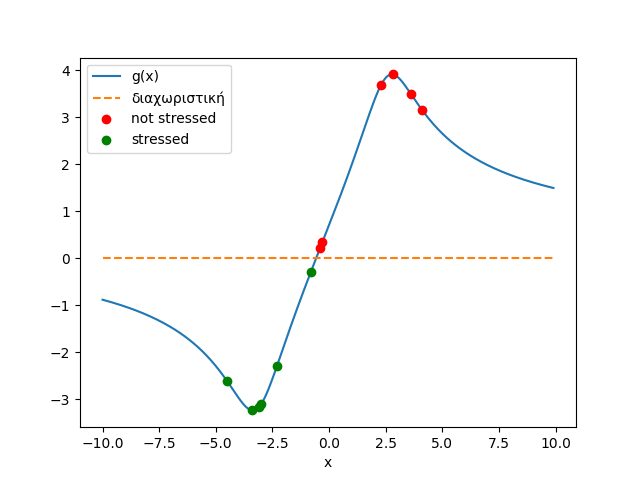

<Figure size 640x480 with 0 Axes>

In [4]:
#ΜΕΡΟΣ A ΕΡΩΤΗΜΑ 2
P_w1=len(D1)/(len(D1)+len(D2)) #Yπολογιζω τις a-priori με βαση τους πλυθησμους
P_w2=len(D2)/(len(D1)+len(D2))

Dtotal=np.concatenate((D1, D2)) #σύνολο όλων των τιμών x
Gvalues=classifier.predict(Dtotal,P_w1,P_w2,u1T,u2T)#τιμες g(x) για τα δεδομενα

#δημιουργια της διαχωριστικής γραμμής
z=np.zeros(len(th))
plt.plot(th,z,'--',label="διαχωριστική")
#τοποθετω τις τιμες g(x) που επεστρεψα απτην συναρτηση predict
stresslabel=0
notstresslabel=0
for i in range(len(Dtotal)):
    if Gvalues[i]>0:
        if notstresslabel==0:
            plt.plot(Dtotal[i],Gvalues[i],'ro',label="not stressed")
            notstresslabel=1
        else:
            plt.plot(Dtotal[i],Gvalues[i],'ro')
    else:
        if stresslabel==0:
            plt.plot(Dtotal[i],Gvalues[i],'go',label="stressed")
            stresslabel=1
        else:
            plt.plot(Dtotal[i],Gvalues[i],'go')
plt.legend()            
plt.show()


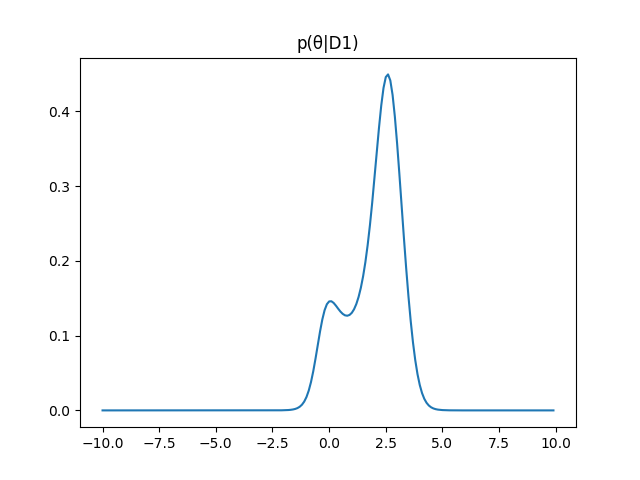

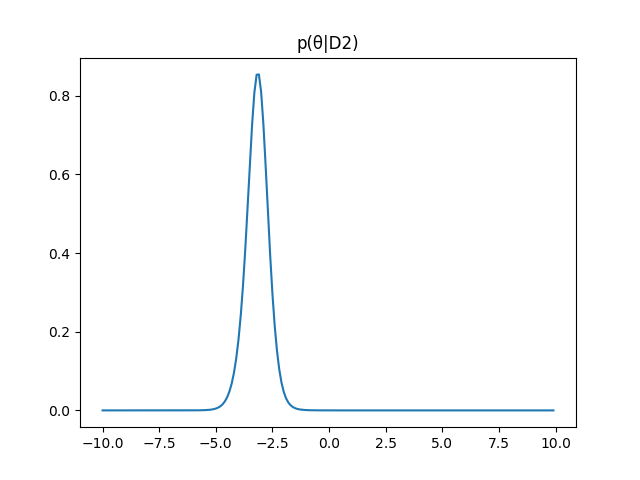

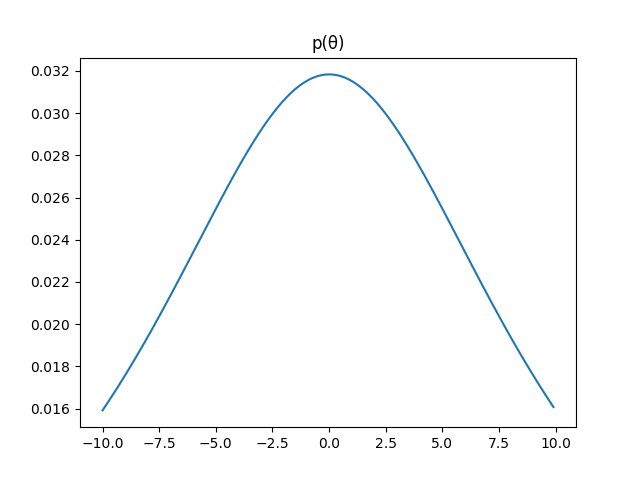

<Figure size 640x480 with 0 Axes>

In [5]:
#MΕΡΟΣ Β ΕΡΩΤΗΜΑ 1
pU=np.zeros(len(th))
pTHD1=np.zeros(len(th))
pTHD2=np.zeros(len(th))
for i in range(len(th)):
    pU[i] = 1/((10*math.pi)*(1+(th[i]/10)**2))     #p(θ)

for i in range(len(th)):
    pTHD1[i]=(Pd1[i]*pU[i])
    pTHD2[i]=(Pd2[i]*pU[i])
#kanonas trapeziou gia ypologismo oloklhrwmatwn
integral1=np.trapz(pTHD1,th,0.1,0)
integral2=np.trapz(pTHD2,th,0.1,0)

for i in range(len(th)):
    pTHD1[i]=pTHD1[i]/integral1
    pTHD2[i]=pTHD2[i]/integral2
plt.plot(th,pTHD1)
plt.title("p(θ|D1)")
plt.show()
plt.plot(th,pTHD2) 
plt.title("p(θ|D2)")
plt.show()
plt.plot(th,pU)
plt.title("p(θ)")
plt.show()



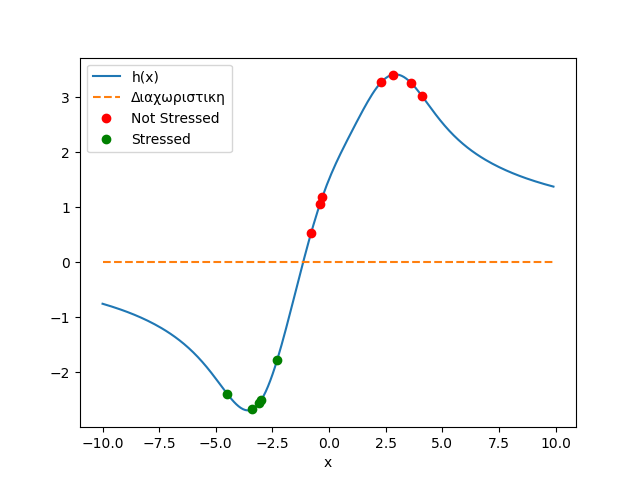

παρατηρουμε ότι με αυτήν την προσέγγιση 0.03183098861837907


<Figure size 640x480 with 0 Axes>

In [6]:
#MΕΡΟΣ Β ΕΡΩΤΗΜΑ 2
def predict(PxD1,PxD2,Pw1,Pw2,x):
    h=np.zeros(len(x))
    for i in range(len(x)):
        h[i]=math.log(PxD1[i])+math.log(Pw1)-math.log(PxD2[i])-math.log(Pw2)
    return h


x= np.arange(-10, 10, 0.1) #τιμες για τo x
PxTH=np.zeros((len(x),len(th))) #P(x|Θ)

for i in range(len(th)):
    for j in range(len(x)): 
        PxTH[j,i]=((1/math.pi)*(1/(1+(x[j]-th[i])**2)))
        
PxD1=np.zeros(len(x))
PxD2=np.zeros(len(x))
pro1=np.zeros((len(x),len(th)))
pro2=np.zeros((len(x),len(th)))

for j in range(len(x)):
    for i in range(len(th)):
        pro1[j,i]=PxTH[j,i]*pTHD1[i]
        pro2[j,i]=PxTH[j,i]*pTHD2[i]
for i in range(len(x)):
    PxD1[i]=np.trapz(pro1[i,:],th,0.1,0)
    PxD2[i]=np.trapz(pro2[i,:],th,0.1,0)

h=predict(PxD1,PxD2,P_w1,P_w2,x)
plt.plot(x,h,label="h(x)")
plt.xlabel("x")

#διαχωριστικη γραμμή
z=np.zeros(len(x))
plt.plot(x,z,'--',label="Διαχωριστικη")

#δινω index της x σε καθε τιμη των D1,D2
indexD=np.zeros(len(Dtotal))
for i in range(len(Dtotal)):
    indexD[i]=int(len(x)/2+(Dtotal[i]/0.1))
    
    
    
    
stresslabel=0
notstresslabel=0
for i in range(len(indexD)):
    if h[int(indexD[i])]>0:
        if notstresslabel==0:
            plt.plot(x[int(indexD[i])],h[int(indexD[i])],'ro',label="Not Stressed")
            notstresslabel=1
        else:
            plt.plot(x[int(indexD[i])],h[int(indexD[i])],'ro')
    else:
        if stresslabel==0:
            plt.plot(x[int(indexD[i])],h[int(indexD[i])],'go',label="Stressed")
            stresslabel=1
        else:
            plt.plot(x[int(indexD[i])],h[int(indexD[i])],'go')
        
        


plt.legend()
plt.show()
